## Justin Parsons
MSDS 650 Week 5  Spring 8W2

# Week 5 Lab: Supervised Learning


## Our Dataset: 
The dataset used in this assignment was sourced using the reference below:  

 [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

In [286]:
# pandas
import pandas as pd

# sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() 

# numpy
import numpy as np
import random

import warnings
warnings.filterwarnings("ignore")

In [287]:
# loading data
tele_df = pd.read_csv("assign_wk5/bank-additional-full.csv", sep = ';')

Here we begin our EDA on the dataset. Note the first part of the EDA was opening the data and the data dictionary. Here we note that the deliminator is ';' and not ','. Also, we see that the target for our ML will be column 20, "y" and is binary. So, we will focus on using KNN classification algorithm.

In [288]:
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [289]:
tele_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [290]:
tele_df.shape

(41188, 21)

In [291]:
tele_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


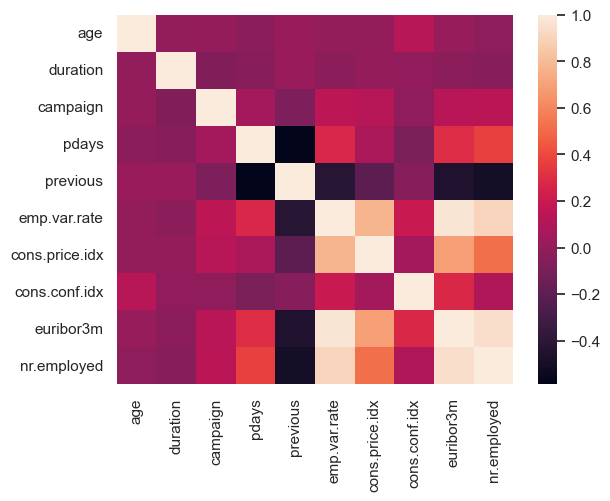

In [292]:
_ = sns.heatmap(tele_df.corr())

We wont do anything to change column names since we have a data dictionary that describes each column well. We do need to handle our missing values (coded as "unknown") and change our categorical string/object datatypes to numerical. We also note high correlation between a few of the features which will help guide our feature engineering. Before handling categorical data we will address the "unknown" values within the data. 

In [293]:
#verifying that null values are represented as "unknown"
tele_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Below are the only features with "unknown" entries. This was determined by running tele_df.FEATURE_NAME.value_counts.unkown. At this point we were pretty lost as to how to treat each feature. This analysis of the data: https://machinelearninghd.com/bank-marketing-case-study-uci/ provided some pretty obvious (in retrospect) insite. We'll treat them each individually to determine how we'll handle the missing values entered as "unknown".

job  
marital  
education  
default  
housing  
loan  


In [294]:
tele_df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [295]:
# percent of unknowns in feature
330/41188*100

0.8012042342429834

For only 0.8% of the data missing we will replace the missing values with the most common.

In [296]:
# replacing all unknowns with admin. 
tele_df['job'] = tele_df['job'].replace('unknown','admin.')

In [297]:
tele_df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Without doing the calculation we can see that 80 is a very small percentage of the total feature. We will proceed the same as with the "job" feature.

In [298]:
# replacing all unknowns with married. 
tele_df['marital'] = tele_df['marital'].replace('unknown','married')

In [299]:
tele_df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

Again this is a low percentage of the total data so we will impute with the most common value. 

In [300]:
# replacing all unknowns with university.degree. 
tele_df['education'] = tele_df['education'].replace('unknown','university.degree')

In [301]:
tele_df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

This feature has over 20% of the sample data missing. This, coupled with the fact that the majority of existing sample data within the feature is "yes" means we can reduce the dimensionality of the dataframe and drop this feature.

In [302]:
tele_df.drop('default', axis=1, inplace=True)

In [303]:
#checking that the feature was dropped
tele_df.sample(10)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
19044,42,technician,married,professional.course,yes,no,cellular,aug,tue,607,3,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,yes
10361,37,entrepreneur,single,university.degree,yes,no,telephone,jun,mon,348,1,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,no
3778,54,retired,married,basic.9y,no,no,telephone,may,fri,370,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
22987,44,technician,married,professional.course,yes,no,cellular,aug,mon,63,6,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
39881,28,management,single,university.degree,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,yes
25456,48,blue-collar,single,basic.9y,yes,no,cellular,nov,wed,43,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
13017,37,entrepreneur,married,basic.9y,unknown,unknown,cellular,jul,tue,268,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
19611,45,admin.,divorced,university.degree,no,yes,cellular,aug,thu,205,4,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
39483,49,admin.,divorced,high.school,no,no,cellular,apr,wed,381,2,999,0,nonexistent,-1.8,93.749,-34.6,0.642,5008.7,no
33940,29,blue-collar,single,basic.9y,no,no,cellular,may,wed,68,1,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no


In [304]:
tele_df.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

The values are nearly equal so we can replace the unkowns with random choices from the possible categorical sample values of 'yes' and 'no'.

In [305]:
# I found this specific method here: https://stackoverflow.com/questions/64322443/how-to-replace-values-in-dataframe-by-choosing-elements-from-list-at-random
yourlist = ['yes','no']
tele_df['housing'] = tele_df['housing'].where(tele_df['housing'] == 'unknown', random.choice(yourlist))

In [306]:
tele_df.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [307]:
# replacing with  most common value
tele_df['loan'] = tele_df['loan'].replace('unknown','no')

In [308]:
tele_df.drop_duplicates(inplace=True)

In [309]:
tele_df.shape

(41168, 20)

We have now performed feature engineering by dropping the "default" feature. Also, we have imputed missing values with either the most common value within that feature or a random value based on how the feature's sample values are distributed. Our next step is to convert the categorical data into numerical data to prepare it for ML. The features (and target) in question are:
 
 1   job             object   
 2   marital         object   
 3   education       object   
~~4   default        object~~   
 5   housing         object   
 6   loan            object   
 7   contact         object   
 8   month           object   
 9   day_of_week     object    
 14  poutcome        object   

Target:  
 20  y               object  
 


In [310]:
# noted the '.' were difficult to deal with so I replaced them
tele_df.columns = ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx','cons_conf_idx', 'euribor3m', 'nr_employed','y']

In [311]:
#I'm also going to re-order the columns to isolate the target 
tele_df = tele_df[["y", "age","job","marital","education","housing","loan","contact","month","day_of_week","duration",
                   "campaign","pdays","previous","poutcome","emp_var_rate","cons_price_idx",
                   "cons_conf_idx","euribor3m","nr_employed"]]
tele_df.sample(10)

,y,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
22310,no,32,technician,married,professional.course,no,no,cellular,aug,thu,68,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
35863,no,37,technician,married,university.degree,no,yes,cellular,may,fri,239,1,999,0,nonexistent,-1.8,92.893,-46.2,1.259,5099.1
21766,no,30,technician,single,professional.course,no,no,cellular,aug,wed,129,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1
13204,no,32,blue-collar,married,basic.4y,no,no,cellular,jul,wed,82,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
1085,no,42,management,married,basic.6y,no,yes,telephone,may,wed,89,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0
8667,no,26,admin.,married,high.school,no,no,telephone,jun,wed,606,2,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
1806,no,25,blue-collar,single,basic.4y,no,no,telephone,may,fri,247,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
19808,no,48,technician,married,university.degree,no,no,cellular,aug,fri,109,2,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1
6570,no,39,blue-collar,married,basic.4y,no,no,telephone,may,wed,151,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
6735,no,31,services,single,high.school,no,no,telephone,may,wed,491,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


Now, we must handle the categorical data. We will use the 'get_dummies' function found in the class example and documented here: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [312]:
tele_encoded = pd.get_dummies(tele_df, columns=['job', 'marital', 'education','housing','loan','contact','month','day_of_week','poutcome'], 
                                       prefix=['job', 'marital', 'education','housing','loan','contact','month','day_of_week','poutcome'])
tele_encoded

,y,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,no,56,261,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
1,no,57,149,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
2,no,37,226,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
3,no,40,151,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
4,no,56,307,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,yes,73,334,1,999,0,-1.1,94.767,-50.8,1.028,...,0,0,1,0,0,0,0,0,1,0
41184,no,46,383,1,999,0,-1.1,94.767,-50.8,1.028,...,0,0,1,0,0,0,0,0,1,0
41185,no,56,189,2,999,0,-1.1,94.767,-50.8,1.028,...,0,0,1,0,0,0,0,0,1,0
41186,yes,44,442,1,999,0,-1.1,94.767,-50.8,1.028,...,0,0,1,0,0,0,0,0,1,0


We have now encoded our dataset's categorical features. 'y' was left out deliberately since it is the target.


## Part 1: KNN Analysis


We can now move into performing ML using the KNN algorithm on the dataset. As usual, we must separate into test and train sets. We will also calculate the optimal value for K in the KNN algorithm. 

In [313]:
array = tele_encoded.values

In [315]:
X = array[:, 1:56]
y = array[:, 0]

In [316]:
# splitting test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now we evaluate for the optimal value of K (number of clusters) and then plot our results.

In [317]:
scores = []
# remember the ending number for range is not inclusive
for k in range(27, 33):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Evaluating 27 clusters
Evaluating 28 clusters
Evaluating 29 clusters
Evaluating 30 clusters
Evaluating 31 clusters
Evaluating 32 clusters


In [318]:
max(scores)

0.9115861063881467


Max accuracy = 91.15861063881468%


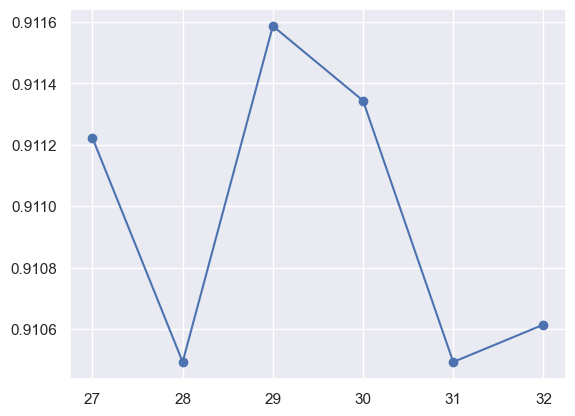

In [319]:
# display the resutls
plt.plot(range(27, 33), scores)
plt.scatter(range(27, 33), scores)
# plt.grid()
plt.xticks(range(27, 33))

print(f'\nMax accuracy = {(max(scores)*100)}%')

We ran this from 2-19 clusters and didn't find an inflection point in the max accuracy so we re-ran the test shifting the range and then bracketing around what appeared to be a maxima. Finally, we landed on 29 as the optimal number of clusters within our test limits with a max accuracy of 91.16%.

One way we could possibly improve our KNN is to reduce the dimensionality of the dataset. The 'duration' feature is interesting in that it has a large number of outliers and is also 0 if there is no conversation. We will drop this feature. 'Age' also has the lowest correlation across all other features according to the heatmap so we will also drop that feature. 

## Part 2: Comparison to other supervised algorithm

In [320]:
tele_encoded.drop(['duration','age'], axis=1, inplace=True)

In [321]:
tele_encoded

,y,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,yes,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41184,no,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41185,no,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41186,yes,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0


In [278]:
array = tele_encoded.values

In [322]:
X = array[:, 1:54]
y = array[:, 0]

In [323]:
# splitting test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [336]:
scores = []
# remember the ending number for range is not inclusive
for k in range(37, 43):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Evaluating 37 clusters
Evaluating 38 clusters
Evaluating 39 clusters
Evaluating 40 clusters
Evaluating 41 clusters
Evaluating 42 clusters


In [337]:
max(scores)

0.9124362399805683


Max accuracy = 91.24362399805683%


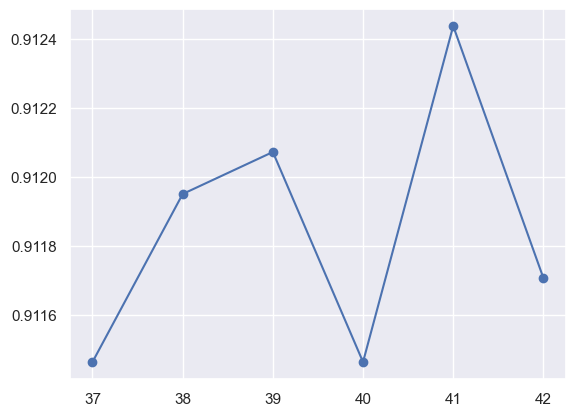

In [338]:
# display the resutls
plt.plot(range(37, 43), scores)
plt.scatter(range(37, 43), scores)
# plt.grid()
plt.xticks(range(37, 43))

print(f'\nMax accuracy = {(max(scores)*100)}%')

In [340]:
model = KNeighborsClassifier(n_neighbors=29, n_jobs=-1)
model.fit(X_train, y_train)
scores.append(model.score(X_test, y_test))

In [342]:
model.score(X_test, y_test)

0.9114646587320865

It appears that 41 is the optimal number of clusters within our test parameters. HOWEVER, 29 only produces an accuracy of 91.14% after dropping 'age' and 'duration' which is very slightly lower than keeping them which produces a 91.16% accuracy.